# Using the Restless Simulator with a Fine-Amplitude Experiment from Qiskit Experiments

The `QutritRestlessSimulator` is compatible with [Qiskit
Experiments](https://qiskit.org/documentation/experiments/), allowing you to simulate experiments in
a restless manner. Qiskit Experiments contains classes which define experiments, such as
`FineXAmplitude` which is used to improve the fidelities of the single-qubit $X$ gate.

In this tutorial you will see how `QutritRestlessSimulator` can be used as a backend for experiments
in Qiskit Experiments. This tutorial does not simulate qutrit circuits, but does cover the steps
needed to update an experiment to use qutrit gates.

In [1]:
import numpy as np
# Import FineXAmplitude experiment
from qiskit_experiments.library import FineXAmplitude

from restless_simulator.circuit import QutritQuantumChannelOperation, QutritUnitaryGate
from restless_simulator.quantum_info import amplitude_damping_channel
from restless_simulator.simulator import QutritRestlessSimulator


In [2]:
# Create simulator
simulator = QutritRestlessSimulator()

## Create FineXAmplitude experiment

Here we create a FineXAmplitude experiment on qubit $0$. Each circuit contains an increasing number
of $X$ gates, which are used to amplify rotation errors on the Bloch sphere arising from
inaccuracies in pulse calibrations.

In [3]:
# Create experiment instance
experiment = FineXAmplitude([0], backend=simulator)

The `FineXAmplitude` circuits contain an initial $\sqrt{X}$-gate to increase the sensitivity of the
experiment.

In [4]:
# Preview circuits
experiment.circuits()[3].draw()

┌────┐┌───┐┌───┐┌─┐
  q: ┤ √X ├┤ X ├┤ X ├┤M├
     └────┘└───┘└───┘└╥┘
c: 1/═════════════════╩═
                      0

### Disabling transpilation

Unfortunately, the transpiling process in experiments can cause issues with the simulator. For this
reason we [Monkey Patch](https://en.wikipedia.org/wiki/Monkey_patch) the `_transpiled_circuits`
method of the experiment to return the un-transpiled circuits. This is done below.

In [5]:
experiment._transpiled_circuits = experiment.circuits

## Simulating the experiment

Qiskit Experiments allows users to run experiments by calling `experiment.run()`, which makes the
execution of experiments simple and easy. The `run()` method returns an `ExperimentData` instance
containing the post-processed results. To run our experiment with restless, we need to enable
restless on the experiment using `.enable_restless`.

In [6]:
# Enable restless
experiment.enable_restless()

As we passed the simulator to the experiment upon construction, we do not need to call
`simulator.run`. Instead we call `experiment.run()`.

In [7]:
experiment.set_transpile_options(basis_gates=None)

In [8]:
experiment.transpile_options

Options(optimization_level=0, basis_gates=None)

The simulator will raise some warnings, which relate to backend options that are not supported.
Before running, we will suppress these warnings so we do not clutter this notebook.

In [9]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="restless_simulator.simulator")

Now we run the experiment as we would with any other backend, such as an IBM Quantum device.

In [10]:
exp_data = experiment.run(simulator)

Now we can plot the results from the experiment data instance to see the simulated measurement
outcomes. We call `block_for_results()` on the experiment data instance so that we wait for the data
analysis and figure generation to complete.

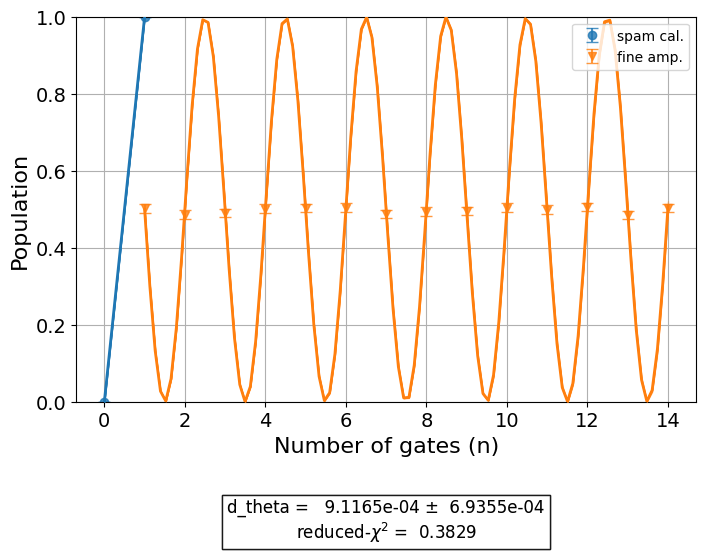

In [11]:
exp_data.block_for_results()
exp_data.figure(0)